In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.colors import LogNorm      
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

from labellines import labelLine, labelLines
from matplotlib.lines import Line2D
import pandas as pd
zps = {'F115W':1587, 'F150W':1074, 'F210M':653,'277':427, 'F360M':253, '430':194, 'F480M':150, '1020': 34.9,'1500':18,'2100':8}

In [2]:
instru = 'nrc'
datasets = []
for casedir in ['5', '1', '2','0']:
    for inc in ['0','30','60']:
        tablename = f'data{casedir}_inc{inc}'
        data = pd.read_csv(f"flux_tables/table_{instru}{casedir}_inc{inc}_pipl.csv")
        data = data.rename(columns={"CPD-bg":"flux1","antiCPD-bg":"flux1anti","mag CPD-antiCPD": "mag2", "mag CPD-bg": "mag1"})
        for col in ['mag1','mag2','SNR_CPD']:
            data[col] = pd.to_numeric(data[col],errors='coerce')
        # add a mag1anti column
        mag1anti =  [2.5 * np.log10(zps[data['filter'][i]]/data['flux1anti'][i]) for i in range(len(data))]
        data['mag1anti'] = mag1anti
        exec(f'{tablename} = data')
        exec(f'datasets.append({tablename})')
        
data0_inc0

,model,filter,CPD tot,Background,flux1,flux1anti,CPD-antiCPD,mag1,mag2,SNR_CPD,flag,mag1anti
0,10jup50au,F115W,0.000007,0.0,0.000007,0.000005,0.000002,20.83,22.23,1.38,nondetect,21.178530
1,10jup50au,F150W,0.000010,0.0,0.000010,0.000007,0.000003,20.06,21.39,1.42,nondetect,20.444787
2,10jup50au,F210M,0.000011,0.0,0.000011,0.000008,0.000002,19.47,21.18,1.26,nondetect,19.722714
3,10jup50au,F360M,0.000017,0.0,0.000017,0.000023,-0.000006,17.94,NaN,0.73,nondetect,17.598771
4,10jup50au,F480M,0.000020,0.0,0.000020,0.000025,-0.000005,17.17,NaN,0.81,nondetect,16.941044
5,5jup50au,F115W,0.000007,0.0,0.000007,0.000006,0.000002,20.83,22.43,1.30,nondetect,21.111755
6,5jup50au,F150W,0.000010,0.0,0.000010,0.000008,0.000003,20.05,21.57,1.33,nondetect,20.361284
7,5jup50au,F210M,0.000010,0.0,0.000010,0.000009,0.000001,19.48,21.64,1.16,nondetect,19.638487
8,5jup50au,F360M,0.000017,0.0,0.000017,0.000027,-0.000010,17.90,NaN,0.64,nondetect,17.425378
9,5jup50au,F480M,0.000022,0.0,0.000022,0.000029,-0.000007,17.11,NaN,0.75,nondetect,16.791747


In [9]:
zps[data['filter'][0]]

1587

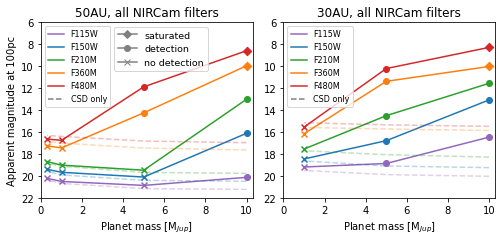

In [3]:
# mass vs mag, diff filters
colors= ['tab:purple','tab:blue','tab:green','tab:orange','tab:red']
plt.figure(figsize=(7,3.3))

for sub in range(2):
    plt.subplot(1,2,sub+1)
    for i in range(5):
        if sub==0:
            x, y, y0, flags = [10,5,1,0.3], data5_inc0.mag1[i:20+i:5].values, data0_inc0.mag1anti[i:20+i:5], data5_inc0.flag[i:20+i:5].values
        elif sub==1:
            x, y, y0, flags = [10,5,1], data5_inc0.mag1[20+i::5].values, data0_inc0.mag1anti[20+i::5], data5_inc0.flag[20+i::5].values
        xsat, ysat = [x[j] for j in range(len(x)) if flags[j] == 'sat'], [y[j] for j in range(len(x)) if flags[j] == 'sat']
        xdet, ydet = [x[j] for j in range(len(x)) if flags[j] == 'detect'], [y[j] for j in range(len(x)) if flags[j] == 'detect']
        xnon, ynon = [x[j] for j in range(len(x)) if flags[j] == 'nondetect'], [y[j] for j in range(len(x)) if flags[j] == 'nondetect']
        plt.scatter(xsat, ysat, c=colors[i], marker='D')
        plt.scatter(xdet, ydet, c=colors[i], marker='o')
        plt.scatter(xnon, ynon, c=colors[i], marker='x')
        plt.plot(x, y,label=data5_inc0['filter'][i], color=colors[i])
        plt.plot(x, y0, alpha=0.3, color=colors[i], linestyle='--')
    plt.xlabel('Planet mass [M$_{Jup}$]')
    if sub==0:
        plt.ylabel('Apparent magnitude at 100pc')
    sep = '50AU' if sub==0 else '30AU'
    plt.title(f'{sep}, all NIRCam filters')
    plt.xlim((0,10.3))
    plt.ylim((22,6))
    handles, labels = plt.gca().get_legend_handles_labels()
    line = Line2D([0], [0], label='CSD only', color='gray', linestyle='--')
    handles.append(line)
    legend1 = plt.legend(handles=handles,prop={'size': 8})
    markercolor, markersize = 'gray', 6
    legend_elements = [Line2D([0], [0], marker='D', color=markercolor, label='saturated', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='o', color=markercolor, label='detection', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='x', color=markercolor, label='no detection', markerfacecolor=markercolor, markersize=markersize)]
    if sub==0:
        legend2 = plt.legend(handles=legend_elements, loc=1, bbox_to_anchor=(0.81,1), prop={'size': 9.5})
        plt.gca().add_artist(legend1)

plt.tight_layout(pad=0.5)
plt.savefig('../simtools/analysis_plots/nrc_mass_mag_filterlines.png', bbox_inches='tight', dpi=200)

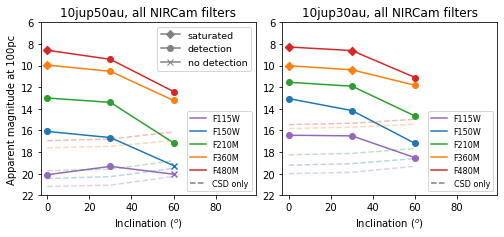

In [4]:
# inc vs flux, diff filters, 10jup 
colors= ['tab:purple','tab:blue','tab:green','tab:orange','tab:red']
titles= ['10jup50au','10jup30au','5jup30au']
plt.figure(figsize=(7,3.3))
for sub in range(2):
    plt.subplot(1,2,sub+1)
    for i in range(5):
        if sub==0:
            x, y = [0,30,60], [data5_inc0.mag1[i],data5_inc30.mag1[i],data5_inc60.mag1[i]]
            y0 = [data0_inc0.mag1anti[i],data0_inc30.mag1anti[i],data0_inc60.mag1anti[i]]
            flags =  [data5_inc0.flag[i],data5_inc30.flag[i],data5_inc60.flag[i]]
        elif sub==1:
            x, y = [0,30,60], [data5_inc0.mag1[i+20],data5_inc30.mag1[i+20],data5_inc60.mag1[i+20]]
            y0 = [data0_inc0.mag1anti[i+20],data0_inc30.mag1anti[i+20],data0_inc60.mag1anti[i+20]]
            flags =  [data5_inc0.flag[i+20],data5_inc30.flag[i+20],data5_inc60.flag[i+20]]
        # elif sub==2:
        #     x, y = [0,30,60], [data5_inc0.mag1[i+25],data5_inc30.mag1[i+25],data5_inc60.mag1[i+25]]
        #     y0 = [data0_inc0.mag1[i+25],data0_inc30.mag1[i+25],data0_inc60.mag1[i+25]]
        #     flags =  [data5_inc0.flag[i+25],data5_inc30.flag[i+25],data5_inc60.flag[i+25]]                        
        xsat, ysat = [x[j] for j in range(len(x)) if flags[j] == 'sat'], [y[j] for j in range(len(x)) if flags[j] == 'sat']
        xdet, ydet = [x[j] for j in range(len(x)) if flags[j] == 'detect'], [y[j] for j in range(len(x)) if flags[j] == 'detect']
        xnon, ynon = [x[j] for j in range(len(x)) if flags[j] == 'nondetect'], [y[j] for j in range(len(x)) if flags[j] == 'nondetect']
        plt.scatter(xsat, ysat, c=colors[i], marker='D')
        plt.scatter(xdet, ydet, c=colors[i], marker='o')
        plt.scatter(xnon, ynon, c=colors[i], marker='x')
        plt.plot(x, y, label=data5_inc0['filter'][i], color=colors[i])
        plt.plot(x, y0, alpha=0.3, color=colors[i], linestyle='--')
    plt.xlabel('Inclination ($^{o}$)')
    if sub==0:
        plt.ylabel('Apparent magnitude at 100pc')
    plt.title(f'{titles[sub]}, all NIRCam filters')
    plt.xlim((-3,99))
    plt.ylim((22,6))
    handles, labels = plt.gca().get_legend_handles_labels()
    line = Line2D([0], [0], label='CSD only', color='gray', linestyle='--')
    handles.append(line)
    legend1 = plt.legend(handles=handles, loc=4,prop={'size': 8})
    markercolor, markersize = 'gray', 6
    legend_elements = [Line2D([0], [0], marker='D', color=markercolor, label='saturated', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='o', color=markercolor, label='detection', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='x', color=markercolor, label='no detection', markerfacecolor=markercolor, markersize=markersize)]
    if sub==0:
        legend2 = plt.legend(handles=legend_elements, loc=1,prop={'size': 9.5})
        plt.gca().add_artist(legend1)
plt.tight_layout(pad=0.7)
plt.savefig('../simtools/analysis_plots/nrc_inc_mag_filterlines.png', bbox_inches='tight', dpi=200)

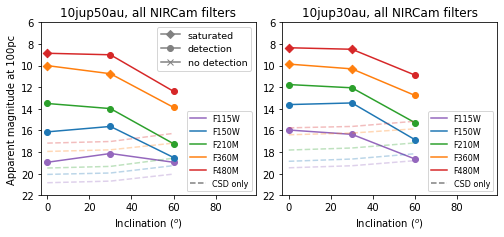

In [5]:
# inc vs mag, diff filters, 10jup case1-CPD only
colors= ['tab:purple','tab:blue','tab:green','tab:orange','tab:red']
titles= ['10jup50au','10jup30au','5jup30au']
plt.figure(figsize=(7,3.3))
for sub in range(2):
    plt.subplot(1,2,sub+1)
    for i in range(5):
        if sub==0:
            x, y = [0,30,60], [data1_inc0.mag1[i],data1_inc30.mag1[i],data1_inc60.mag1[i]]
            y0 = [data0_inc0.mag1[i],data0_inc30.mag1[i],data0_inc60.mag1[i]]
            flags =  [data1_inc0.flag[i],data1_inc30.flag[i],data1_inc60.flag[i]]
        elif sub==1:
            x, y = [0,30,60], [data1_inc0.mag1[i+20],data1_inc30.mag1[i+20],data1_inc60.mag1[i+20]]
            y0 = [data0_inc0.mag1[i+20],data0_inc30.mag1[i+20],data0_inc60.mag1[i+20]]
            flags =  [data1_inc0.flag[i+20],data1_inc30.flag[i+20],data1_inc60.flag[i+20]]
        # elif sub==2:
        #     x, y = [0,30,60], [data5_inc0.mag1[i+25],data5_inc30.mag1[i+25],data5_inc60.mag1[i+25]]
        #     y0 = [data0_inc0.mag1[i+25],data0_inc30.mag1[i+25],data0_inc60.mag1[i+25]]
        #     flags =  [data5_inc0.flag[i+25],data5_inc30.flag[i+25],data5_inc60.flag[i+25]]                        
        xsat, ysat = [x[j] for j in range(len(x)) if flags[j] == 'sat'], [y[j] for j in range(len(x)) if flags[j] == 'sat']
        xdet, ydet = [x[j] for j in range(len(x)) if flags[j] == 'detect'], [y[j] for j in range(len(x)) if flags[j] == 'detect']
        xnon, ynon = [x[j] for j in range(len(x)) if flags[j] == 'nondetect'], [y[j] for j in range(len(x)) if flags[j] == 'nondetect']
        plt.scatter(xsat, ysat, c=colors[i], marker='D')
        plt.scatter(xdet, ydet, c=colors[i], marker='o')
        plt.scatter(xnon, ynon, c=colors[i], marker='x')
        plt.plot(x, y, label=data1_inc0['filter'][i], color=colors[i])
        plt.plot(x, y0, alpha=0.3, color=colors[i], linestyle='--')
    plt.xlabel('Inclination ($^{o}$)')
    if sub==0:
        plt.ylabel('Apparent magnitude at 100pc')
    plt.title(f'{titles[sub]}, all NIRCam filters')
    plt.xlim((-3,99))
    plt.ylim((22,6))
    handles, labels = plt.gca().get_legend_handles_labels()
    line = Line2D([0], [0], label='CSD only', color='gray', linestyle='--')
    handles.append(line)
    legend1 = plt.legend(handles=handles, loc=4,prop={'size': 8})
    markercolor, markersize = 'gray', 6
    legend_elements = [Line2D([0], [0], marker='D', color=markercolor, label='saturated', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='o', color=markercolor, label='detection', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='x', color=markercolor, label='no detection', markerfacecolor=markercolor, markersize=markersize)]
    if sub==0:
        legend2 = plt.legend(handles=legend_elements, loc=1,prop={'size': 9.5})
        plt.gca().add_artist(legend1)
plt.tight_layout(pad=0.7)
plt.savefig('../simtools/analysis_plots/nrc1_inc_mag_filterlines.png', bbox_inches='tight', dpi=200)

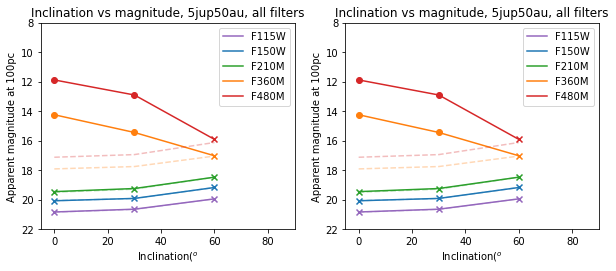

In [129]:
# inc vs mag, diff filters, 10jup
colors= ['tab:purple','tab:blue','tab:green','tab:orange','tab:red']
plt.figure(figsize=(10,3.8))
for sub in range(2):
    plt.subplot(1,2,sub+1)
    for i in range(5):
        x, y = [0,30,60], [data5_inc0.mag1[i+5],data5_inc30.mag1[i+5],data5_inc60.mag1[i+5]]
        y0 = [data0_inc0.mag1[i+5],data0_inc30.mag1[i+5],data0_inc60.mag1[i+5]]
        flags =  [data5_inc0.flag[i+5],data5_inc30.flag[i+5],data5_inc60.flag[i+5]]
        xsat, ysat = [x[j] for j in range(len(x)) if flags[j] == 'sat'], [y[j] for j in range(len(x)) if flags[j] == 'sat']
        xdet, ydet = [x[j] for j in range(len(x)) if flags[j] == 'detect'], [y[j] for j in range(len(x)) if flags[j] == 'detect']
        xnon, ynon = [x[j] for j in range(len(x)) if flags[j] == 'nondetect'], [y[j] for j in range(len(x)) if flags[j] == 'nondetect']
        plt.scatter(xsat, ysat, c=colors[i], marker='D')
        plt.scatter(xdet, ydet, c=colors[i], marker='o')
        plt.scatter(xnon, ynon, c=colors[i], marker='x')
        plt.plot(x, y, label=data5_inc0['filter'][i+5], color=colors[i])
        plt.plot(x, y0, alpha=0.3, color=colors[i], linestyle='--')
    plt.xlabel('Inclination($^{o}$')
    plt.ylabel('Apparent magnitude at 100pc')
    plt.title('Inclination vs magnitude, 5jup50au, all filters')
    plt.xlim((-5,90))
    plt.ylim((22,8))
    plt.legend()

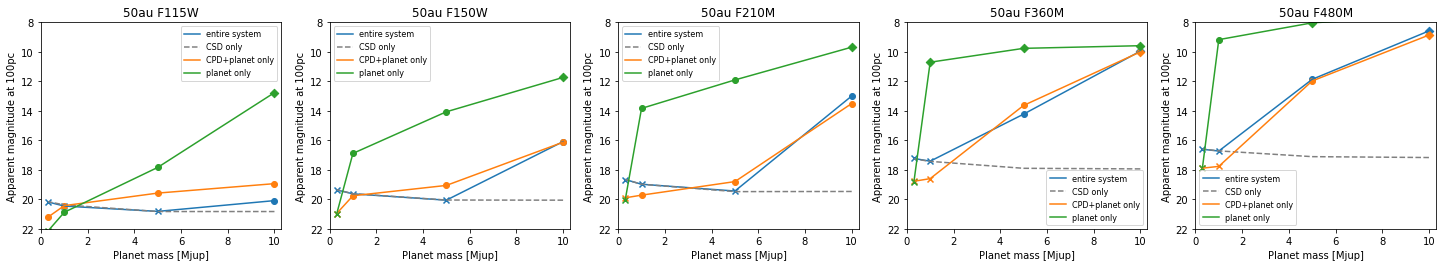

In [130]:
# mass vs magnitude diff cases 50au
colors= ['tab:blue','tab:red','tab:orange','tab:green']
labels= ['entire system', 'CSD only' ,'CPD+planet only', 'planet only']
cases= ['5','0','1','2']
plt.figure(figsize=(25,3.8))

for sub in range(5):
    plt.subplot(1,5,sub+1)
    x = [10,5,1,0.3]
    for i in range(4):
        y = eval(f'data{cases[i]}_inc0.mag1[sub:20+sub:5].values')
        if i==1:
            plt.plot(x, y, color='gray', linestyle='--', label=labels[i])
        else:
            flags =  eval(f'data{cases[i]}_inc0.flag[sub:20+sub:5].values')
            xsat, ysat = [x[j] for j in range(len(x)) if flags[j] == 'sat'], [y[j] for j in range(len(x)) if flags[j] == 'sat']
            xdet, ydet = [x[j] for j in range(len(x)) if flags[j] == 'detect'], [y[j] for j in range(len(x)) if flags[j] == 'detect']
            xnon, ynon = [x[j] for j in range(len(x)) if flags[j] == 'nondetect'], [y[j] for j in range(len(x)) if flags[j] == 'nondetect']
            plt.scatter(xsat, ysat, c=colors[i], marker='D')
            plt.scatter(xdet, ydet, c=colors[i], marker='o')
            plt.scatter(xnon, ynon, c=colors[i], marker='x')
            plt.plot(x, y, color=colors[i], label=labels[i])

    plt.legend(prop={'size': 8})
    plt.xlabel('Planet mass [Mjup]')
    plt.ylabel('Apparent magnitude at 100pc')
    plt.title('50au '+data['filter'][sub])
    plt.xlim((0,10.3))
    plt.ylim((22,8))

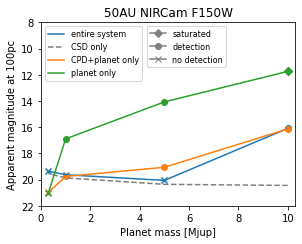

In [5]:
# mass vs magnitude diff cases single
colors= ['tab:blue','tab:red','tab:orange','tab:green']
labels= ['entire system', 'CSD only' ,'CPD+planet only', 'planet only']
cases= ['5','0','1','2']
plt.figure(figsize=(4.3,3.5))
x = [10,5,1,0.3]
for i in range(4):
    if i==1:
        y = data0_inc0.mag1anti[1:20+1:5].values
        plt.plot(x, y, color='gray', linestyle='--', label=labels[i])
    else:
        y = eval(f'data{cases[i]}_inc0.mag1[1:20+1:5].values')
        flags =  eval(f'data{cases[i]}_inc0.flag[1:20+1:5].values')
        xsat, ysat = [x[j] for j in range(len(x)) if flags[j] == 'sat'], [y[j] for j in range(len(x)) if flags[j] == 'sat']
        xdet, ydet = [x[j] for j in range(len(x)) if flags[j] == 'detect'], [y[j] for j in range(len(x)) if flags[j] == 'detect']
        xnon, ynon = [x[j] for j in range(len(x)) if flags[j] == 'nondetect'], [y[j] for j in range(len(x)) if flags[j] == 'nondetect']
        plt.scatter(xsat, ysat, c=colors[i], marker='D')
        plt.scatter(xdet, ydet, c=colors[i], marker='o')
        plt.scatter(xnon, ynon, c=colors[i], marker='x')
        plt.plot(x, y, color=colors[i], label=labels[i])
legend1 = plt.legend(prop={'size': 8})
plt.xlabel('Planet mass [Mjup]')
plt.ylabel('Apparent magnitude at 100pc')
plt.title('50AU NIRCam '+data['filter'][1])
plt.xlim((0,10.3))
plt.ylim((22,8))

markercolor, markersize = 'gray', 6
legend_elements = [Line2D([0], [0], marker='D', color=markercolor, label='saturated', markerfacecolor=markercolor, markersize=markersize),
                    Line2D([0], [0], marker='o', color=markercolor, label='detection', markerfacecolor=markercolor, markersize=markersize),
                    Line2D([0], [0], marker='x', color=markercolor, label='no detection', markerfacecolor=markercolor, markersize=markersize)]
legend2 = plt.legend(handles=legend_elements, loc=3, bbox_to_anchor=(0.4, 0.735),prop={'size': 8})
plt.gca().add_artist(legend1)
plt.tight_layout()
plt.savefig('../simtools/analysis_plots/mass_mag_cases.png', bbox_inches='tight', dpi=200)

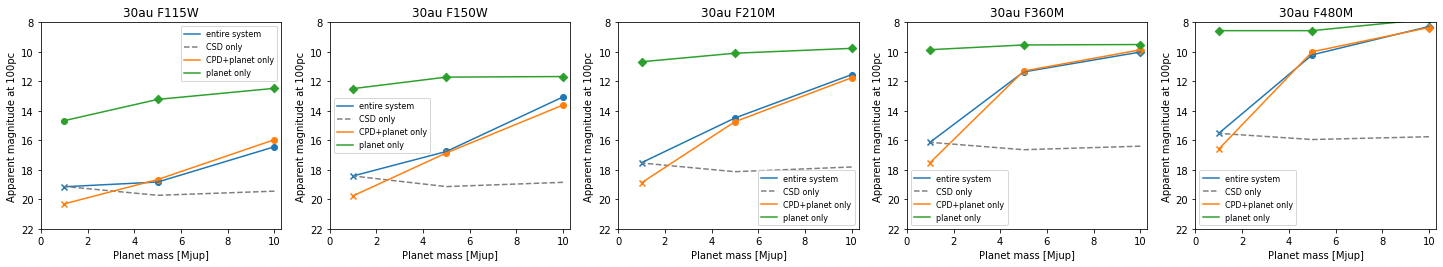

In [131]:
# mass vs magnitude diff cases 30au
colors= ['tab:blue','tab:red','tab:orange','tab:green']
labels= ['entire system', 'CSD only' ,'CPD+planet only', 'planet only']
cases= ['5','0','1','2']
plt.figure(figsize=(25,3.8))

for sub in range(5):
    plt.subplot(1,5,sub+1)
    x = [10,5,1]
    for i in range(4):
        y = eval(f'data{cases[i]}_inc0.mag1[20+sub::5].values')
        if i==1:
            plt.plot(x, y, color='gray', linestyle='--', label=labels[i])
        else:
            flags =  eval(f'data{cases[i]}_inc0.flag[20+sub::5].values')
            xsat, ysat = [x[j] for j in range(len(x)) if flags[j] == 'sat'], [y[j] for j in range(len(x)) if flags[j] == 'sat']
            xdet, ydet = [x[j] for j in range(len(x)) if flags[j] == 'detect'], [y[j] for j in range(len(x)) if flags[j] == 'detect']
            xnon, ynon = [x[j] for j in range(len(x)) if flags[j] == 'nondetect'], [y[j] for j in range(len(x)) if flags[j] == 'nondetect']
            plt.scatter(xsat, ysat, c=colors[i], marker='D')
            plt.scatter(xdet, ydet, c=colors[i], marker='o')
            plt.scatter(xnon, ynon, c=colors[i], marker='x')
            plt.plot(x, y, color=colors[i], label=labels[i])

    plt.legend(prop={'size': 8})
    plt.xlabel('Planet mass [Mjup]')
    plt.ylabel('Apparent magnitude at 100pc')
    plt.title('30au '+data['filter'][sub])
    plt.xlim((0,10.3))
    plt.ylim((22,8))

(22.0, 8.0)

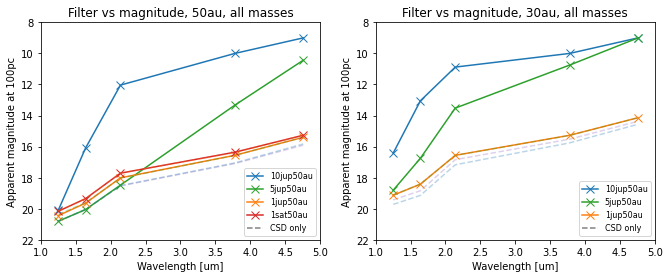

In [18]:
# filter vs mag, diff masses
colors= ['tab:purple','tab:blue','tab:green','tab:orange','tab:red']
plt.figure(figsize=(11,4))

plt.subplot(1,2,1)
for i in range(4):
    x, y = [1.25,1.64,2.14,3.78,4.76], data.mag1[5*i:5*i+5]
    plt.plot(x, y, marker='x', markersize=8,label=data['model'][5*i], color=colors[i+1])
    plt.plot(x, data0.mag1[5*i:5*i+5], alpha=0.3, color=colors[i], linestyle='--')
plt.xlabel('Wavelength [um]')
plt.ylabel('Apparent magnitude at 100pc')
plt.title('Filter vs magnitude, 50au, all masses')
plt.xlim((1,5))
plt.ylim((22,8))
handles, labels = plt.gca().get_legend_handles_labels()
line = Line2D([0], [0], label='CSD only', color='gray', linestyle='--')
handles.append(line)
plt.legend(handles=handles,prop={'size': 8})
#plt.axhline(y=i, color='gray', linestyle='--')
    
plt.subplot(1,2,2)
for i in range(3):
    x, y = [1.25,1.64,2.14,3.78,4.76], data.mag1[5*i+20:5*i+25]
    plt.plot(x, y, marker='x',markersize=8, label=data['model'][5*i], color=colors[i+1])
    plt.plot(x, data0.mag1[5*i+20:5*i+25], alpha=0.3, color=colors[i], linestyle='--')
handles, labels = plt.gca().get_legend_handles_labels()
line = Line2D([0], [0], label='CSD only', color='gray', linestyle='--')
handles.append(line)
plt.legend(handles=handles,prop={'size': 8})
plt.xlabel('Wavelength [um]')
plt.ylabel('Apparent magnitude at 100pc')
plt.title('Filter vs magnitude, 30au, all masses')
plt.xlim((1,5))
plt.ylim((22,8))

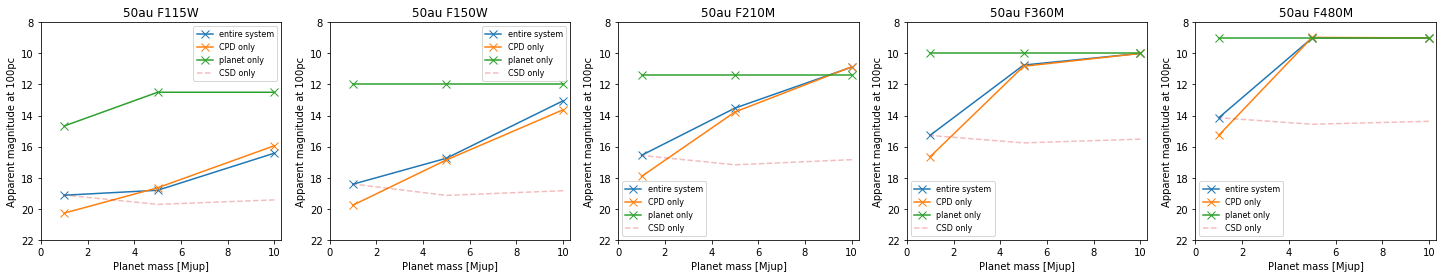

In [57]:
plt.figure(figsize=(25,4))
for j in range(5):
    plt.subplot(1,5,j+1)
    x = [10,5,1]
    plt.plot(x, data.mag1[20+j::5], marker='x',markersize=8, label='entire system')
    plt.plot(x, data1.mag1[20+j::5], marker='x',markersize=8, label='CPD only')
    plt.plot(x, data2.mag1[20+j::5], marker='x',markersize=8, label='planet only')
    plt.plot(x, data0.mag1[20+j::5], alpha=0.3, color=colors[i], linestyle='--', label='CSD only')

    plt.legend(prop={'size': 8})
    plt.xlabel('Planet mass [Mjup]')
    plt.ylabel('Apparent magnitude at 100pc')
    plt.title('30au '+data['filter'][j])
    plt.xlim((0,10.3))
    plt.ylim((22,8))

## Construct table

In [10]:
table=[datasets[0]['model'].values, datasets[0]['filter'].values]
for n in range(len(datasets)):
    col=[]
    for i in range(len(datasets[n])):
        if n > 8:
            a = datasets[n]['mag1anti'][i]
            col.append(f'{a:.2f}')
        else:
            a = datasets[n]['mag2'][i]
            if datasets[n]['flag'][i] == 'sat':
                col.append(f'<{a:.2f}')
            elif datasets[n]['flag'][i] == 'detect':
                col.append(f'{a:.2f}')
            else:
                col.append('/')
    table.append(col)
tabledf = pd.DataFrame.from_records(table).T
tabledf.columns=['model','filter','0$^{\circ}$','30$^{\circ}$','60$^{\circ}$','0$^{\circ}$','30$^{\circ}$','60$^{\circ}$','0$^{\circ}$','30$^{\circ}$','60$^{\circ}$','0$^{\circ}$','30$^{\circ}$','60$^{\circ}$']
tabledf.to_csv('./flux_tables/nrc_combined.csv')

In [11]:
tabledf

,model,filter,0$^{\circ}$,30$^{\circ}$,60$^{\circ}$,0$^{\circ}$,30$^{\circ}$,60$^{\circ}$,0$^{\circ}$,30$^{\circ}$,60$^{\circ}$,0$^{\circ}$,30$^{\circ}$,60$^{\circ}$
0,10jup50au,F115W,20.58,19.56,/,18.99,18.16,18.99,<12.77,<12.75,<13.23,21.18,21.05,20.25
1,10jup50au,F150W,16.11,16.70,/,16.14,15.63,18.58,<11.74,<11.71,<12.29,20.44,20.27,19.50
2,10jup50au,F210M,13.00,13.42,17.42,13.51,13.98,17.28,<9.69,<9.72,<9.92,19.72,19.59,18.80
3,10jup50au,F360M,<9.96,10.55,13.27,<10.01,<10.76,13.88,<9.66,<9.62,<9.49,17.60,17.46,16.93
4,10jup50au,F480M,<8.60,9.44,12.45,<8.88,9.02,12.40,<7.64,<7.66,<7.82,16.94,16.79,16.14
5,5jup50au,F115W,/,/,/,19.67,19.52,19.49,17.86,17.40,17.38,21.11,20.93,20.12
6,5jup50au,F150W,/,/,/,19.19,19.06,18.97,14.07,13.87,13.87,20.36,20.19,19.34
7,5jup50au,F210M,/,/,/,19.04,18.90,18.95,11.91,12.13,12.03,19.64,19.47,18.61
8,5jup50au,F360M,14.29,15.65,/,13.65,14.60,18.69,<9.78,<9.92,<9.91,17.43,17.28,16.67
9,5jup50au,F480M,11.89,12.93,/,11.99,12.62,17.19,<8.05,<8.10,<8.10,16.79,16.63,15.87
